# 코드 예시) Random 함수


In [ ]:
import random

In [ ]:
#random.random() -> 0.0에서 1.0사이의 실수 중에서 난수값 리턴
print(random.random())
# ex) 0.2664520652284096

#random.uniform(a, b) -> 괄호 안 두 수 사이의 실수 중에서 난수값을 리턴
print(random.uniform(10, 30))
# ex) 28.038707445386397

#random.randint(a, b) -> 괄호 안 두 수 사이의 정수 중에서 난수값을 리턴
print(random.randint(100,200))
# ex) 106

#random.choice(sample) 함수 -> sample에서 무작위로 하나를 선택하여 리턴
data = [1, 2, 3, 4, 5, 6, 7]
print(random.choice(data))
# ex) 5

#random.sample(sample, n) -> 입력으로 받은 sample 에서 정한 개수만큼  무작위로 뽑아 리턴함
data = [1, 2, 3, 4, 'apple', 'banna']
print(random.sample(data, 3))
# ex) ['apple', 2, 3]
print(random.sample(data, 3))
# ex) ['apple', 3, 'banna']
print(random.sample(data, 5))
# ex) [2, 3, 1, 'apple', 4]

0.9856970175863436
15.83986933753642
133
5
[1, 4, 'apple']
[2, 4, 1]
[2, 'apple', 'banna', 3, 4]


# 실습1. 난수 히스토그램 그리기(파이썬 random 모듈)

In [30]:
# import packages
import matplotlib.pyplot as plt
from tqdm import tqdm # optional
import random

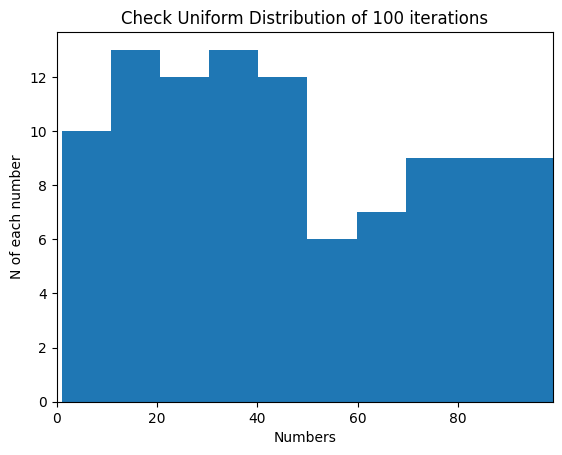

In [31]:
# 100번 수행
num_iterations = 100
random_integers = []

## write answer
##
##
##
##
##
##
##
for _ in range(num_iterations) :
  x = random.randint(0, 99)
  random_integers.append(x)


fig = plt.figure()
plt.hist(random_integers)
plt.title(f"Check Uniform Distribution of {num_iterations} iterations")
plt.xlabel("Numbers")
plt.ylabel("N of each number")
plt.xlim([0, 99])
plt.show()

# 실습 2. Linear Congruential Generator(LCG) 구현  

X_(n+1) = (aX_n+C) mod m

LCG는 다음과 같은 인자들로 유일하게 결정됨  
  - 0 < m, 0 < a < m, 0 <= c < m, 0<=초기값 < m  

최대 주기 m을 가지기 위한 필요충분조건  

  - c와 m이 서로소, a-1이 m의 모든 소인수로 나뉨
  - m이 4의 배수면 a-1도 4의 배수

In [35]:
def lcg(seed, loop, m=2**32, a=214013, c=2531011):
    for i in range(loop):
        # write answ
        seed = (a * seed + c) % m
        # yield
        yield seed

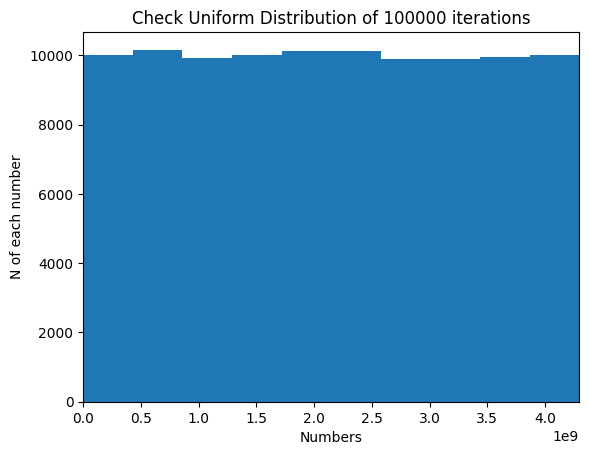

In [98]:
num_iterations = 100000
random_generator = lcg(seed=13, loop=num_iterations, m=2**32)
random_integers = []



## write answer
##
##
##
##
##
##
##

for i in random_generator:
  random_integers.append(i)


fig = plt.figure()
plt.hist(random_integers)
plt.title(f"Check Uniform Distribution of {num_iterations} iterations")
plt.xlabel("Numbers")
plt.ylabel("N of each number")
plt.xlim([0, 2**32])
plt.show()

# 실습 2-2 난수들 중 Uniform Distribution 확인  


In [73]:
# LCG
from collections import defaultdict
import numpy as np

for num_iterations in [1000,10000,100000]:
    random_integers = []
    random_integer_dict = defaultdict(int)
    random_generator = lcg(seed=7, loop=num_iterations, m=256)
    for _ in range(num_iterations):
        integer = next(random_generator)
        random_integers.append(integer)
        random_integer_dict[integer]+=1

    mean = np.mean(list(random_integer_dict.values()))/num_iterations
    error = np.mean([abs(x/num_iterations-mean) for x in list(random_integer_dict.values())])


    print(f"LCG 시행횟수 {num_iterations}에서의 uniform distribution 오차 : {error}")

LCG 시행횟수 1000에서의 uniform distribution 오차 : 0.00016992187500000007
LCG 시행횟수 10000에서의 uniform distribution 오차 : 1.1718750000000173e-05
LCG 시행횟수 100000에서의 uniform distribution 오차 : 4.687500000000243e-06


In [97]:
import numpy as np
from collections import defaultdict
import random

# 메르센 트위스터
for num_iterations in [1000, 10000, 100000]:
    random_integers = []
    random_integer_dict = defaultdict(int)

    # 메르센 트위스터 난수 생성기 초기화
    random_generator = random.Random()  # 기본 메르센 트위스터 사용
    random_generator.seed(7)  # 시드 설정

    for _ in range(num_iterations):

        integer = random_generator.randint(0, 256)
        random_integers.append(integer)
        random_integer_dict[integer] += 1

    mean = np.mean(list(random_integer_dict.values())) / num_iterations
    error = np.mean([abs(x / num_iterations - mean) for x in list(random_integer_dict.values())])

    print(f"메르센 트위스터 시행횟수 {num_iterations}에서의 uniform distribution 오차 : {error}")

메르센 트위스터 시행횟수 1000에서의 uniform distribution 오차 : 0.0014363581530451898
메르센 트위스터 시행횟수 10000에서의 uniform distribution 오차 : 0.0005173764932095868
메르센 트위스터 시행횟수 100000에서의 uniform distribution 오차 : 0.00016143560084179925


# 실습 3. 주사위 합이 8인 경우

In [41]:
# 출력시 컬러 지원 가능 모듈 설치
!pip install termcolor
from termcolor import colored
!pip install colorama
from colorama import init, Fore, Back, Style


In [47]:
def roll_dice():
    ## write answer
    return random.randint(1, 6), random.randint(1, 6)

In [67]:


dice_tries = []
num_iterations = 100
hits = 0

for _ in range(num_iterations):
    x, y = roll_dice()
    dice_tries.append((x, y))
    if x + y == 8:
        hits += 1

print("=" * 100)
print(colored("* 두 주사위의 합이 8인 경우에는 cyan 색의 음영이 들어가 있음 *", 'red'))

for i in range(num_iterations):
    x, y = dice_tries[i]
    if x + y == 8:
        print(f"try {i + 1:3}: {x:2} {y:2} ", colored("", "cyan"), end="   ")
    else:
        print(f"try {i + 1:3}: {x:2} {y:2}  ", end="   ")

    if (i + 1) % 5 == 0:
        print()  # 5번째마다 줄바꿈

print(colored("\n실제 값 : 0.138889", "red"))
print(colored(f"계산된 값 : {round(hits / num_iterations, 6)}", "red"))
print(colored(f"오차율 : {abs(hits / num_iterations - 5/36) / (5/36) * 100} %", "red"))
print("=" * 100)

* 두 주사위의 합이 8인 경우에는 cyan 색의 음영이 들어가 있음 *
try   1:  1  2     try   2:  5  5     try   3:  2  4     try   4:  5  3     try   5:  1  2     
try   6:  4  5     try   7:  4  3     try   8:  1  3     try   9:  6  4     try  10:  2  3     
try  11:  4  4     try  12:  2  3     try  13:  4  6     try  14:  4  5     try  15:  1  4     
try  16:  1  3     try  17:  2  3     try  18:  6  6     try  19:  4  4     try  20:  6  5     
try  21:  4  3     try  22:  2  1     try  23:  6  3     try  24:  3  1     try  25:  5  2     
try  26:  6  1     try  27:  6  6     try  28:  6  5     try  29:  2  6     try  30:  5  3     
try  31:  6  2     try  32:  5  3     try  33:  2  3     try  34:  6  6     try  35:  2  2     
try  36:  3  6     try  37:  4  3     try  38:  1  4     try  39:  4  3     try  40:  3  1     
try  41:  2  4     try  42:  6  1     try  43:  3  2     try  44:  6  4     try  45:  2  1     
try  46:  5  1     try  47:  2  1     try  48:  5  6     try  49:  2  4     try  50:  5  4     